In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches_new = pd.read_csv('matches_new.csv')

In [3]:
matches_new.head()

,match week,date_time,team,xg,score,xg.1,opponent,stadium,home_team_score,away_team_score,result,opp_code,day_code,venue_code,target,season,total_wins,total_goals,appearances
0,1,2022-06-09 18:45:00,Dinamo Zagreb,0.6,1-0,0.9,Chelsea FC,Stadion Maksimir,1,0,W,7,3,1,1,2023,1.0,83,32
1,1,2022-06-09 18:45:00,Borussia Dortmund,2.3,3-0,0.5,FC Copenhagen,Signal Iduna Park,3,0,W,12,3,1,1,2023,21.0,9,15
2,1,2022-06-09 18:45:00,Celtic FC,1.4,0-3,1.9,Real Madrid,Celtic Park,0,3,L,24,3,1,2,2023,1.0,67,27
3,1,2022-06-09 18:45:00,SL Benfica,1.1,2-0,0.2,Maccabi Haifa,Estádio do Sport Lisboa e Benfica,2,0,W,17,3,1,1,2023,10.0,26,16
4,1,2022-06-09 21:00:00,RB Salzburg,1.3,1-1,0.9,AC Milan,Red Bull Arena,1,1,D,0,3,1,0,2023,6.0,9,15


In [4]:
# check the format of the datetime column
format_str = pd.to_datetime(matches_new['date_time'], infer_datetime_format=True).dt.strftime('%Y-%m-%d %H:%M:%S').iloc[0]
print(f'The format of datetime values in the column is: {format_str}')


The format of datetime values in the column is: 2022-06-09 18:45:00


In [5]:
import pandas as pd

matches = pd.read_csv("matches.csv")

In [6]:
# check the format of the datetime column
format_str = pd.to_datetime(matches['date_time'], infer_datetime_format=True).dt.strftime('%Y-%m-%d %H:%M:%S').iloc[0]
print(f'The format of datetime values in the column is: {format_str}')


The format of datetime values in the column is: 2021-09-15 20:00:00


In [7]:
# convert the datetime column to datetime dtype
matches_new['date_time'] = pd.to_datetime(matches_new['date_time'])

In [8]:
# convert the datetime column to datetime dtype
matches['date_time'] = pd.to_datetime(matches['date_time'])

In [9]:
matches_new.dtypes

match week                  int64
date_time          datetime64[ns]
team                       object
xg                        float64
score                      object
xg.1                      float64
opponent                   object
stadium                    object
home_team_score             int64
away_team_score             int64
result                     object
opp_code                    int64
day_code                    int64
venue_code                  int64
target                      int64
season                      int64
total_wins                float64
total_goals                 int64
appearances                 int64
dtype: object

In [10]:
matches.isnull().sum()

match_id             0
season               0
date_time            0
team                 0
opponent             0
stadium              0
home_team_score      0
away_team_score      0
penalty_shoot_out    0
attendance           0
result               0
timestamp            0
opp_code             0
day_code             0
venue_code           0
target               0
total_wins           0
total_goals          0
appearances          0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [13]:
import joblib

# Load the trained Logistic Regression model
svm = joblib.load('match_prediction_model_svm_test2.joblib')

In [14]:
train=matches[matches["date_time"]< '2022-06-01']

In [15]:
test = matches_new[matches_new["date_time"] > '2022-06-01']

In [16]:
# Define the predictors
predictors = ["venue_code", "opp_code", "day_code", "total_wins"]

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_imputed = pd.DataFrame(imputer.fit_transform(train[predictors]), columns=predictors, index=train.index)
test_imputed = pd.DataFrame(imputer.transform(test[predictors]), columns=predictors, index=test.index)

In [18]:

# Train the SVM model on the training set
svm.fit(train[predictors], train["target"])

SVC(gamma='auto')

In [19]:
preds=svm.predict(test[predictors])

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test["target"], preds)
print("Accuracy:", accuracy)

Accuracy: 0.4838709677419355


In [21]:
result_df = pd.concat([test['target'], pd.Series(preds, name='predicted', index=test.index)], axis=1)
print(result_df)

     target  predicted
0         1          1
1         1          1
2         2          2
3         1          1
4         0          0
..      ...        ...
119       0          2
120       0          0
121       0          2
122       0          0
123       0          1

[93 rows x 2 columns]


In [22]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test["target"], preds)
print(cm)

[[ 4 13  8]
 [ 0 32  8]
 [ 1 18  9]]


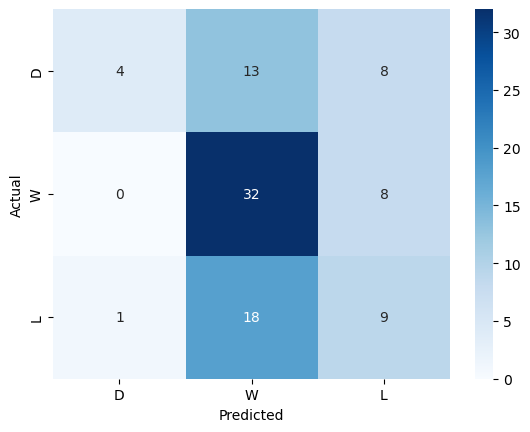

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["D", "W", "L"], yticklabels=["D", "W", "L"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [25]:
pd.crosstab(index=combined["actual"], columns= combined["prediction"])

prediction,0,1,2
actual,,,
0,4,13,8
1,0,32,8
2,1,18,9


In [29]:
from sklearn.metrics import precision_score

precision = precision_score(test["target"], preds, average='weighted', zero_division=1)
print("Precision Score: {:.2f}".format(precision))

Precision Score: 0.54


In [30]:
from sklearn.metrics import f1_score

f1 = f1_score(test["target"], preds, average='weighted', zero_division=1)
print("F1 Score: {:.2f}".format(f1))


F1 Score: 0.44
